# LDA from scratch in Python

Step by step caluclation of LDA algorithm with collapsed Gibbs sampling to make it easy to follow

In [1]:
%matplotlib inline
from IPython.display import display
import random
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)
## Generate a corpus
rawdocs = ['eat turkey on turkey day holiday',
          'i like to eat cake on holiday',
          'turkey trot race on thanksgiving holiday',
          'snail race the turtle',
          'time travel space race',
          'movie on thanksgiving',
          'movie at air and space museum is cool movie',
          'aspiring movie star']

docs = [row.split() for row in rawdocs]
## PARAMETERS
K = 2 # number of topics
alpha = 1 # hyperparameter. single value indicates symmetric dirichlet prior. higher=>scatters document clusters
eta = .001 # hyperparameter
iterations = 3 # iterations for collapsed gibbs sampling.  This should be a lot higher than 3 in practice.
docs

[['eat', 'turkey', 'on', 'turkey', 'day', 'holiday'],
 ['i', 'like', 'to', 'eat', 'cake', 'on', 'holiday'],
 ['turkey', 'trot', 'race', 'on', 'thanksgiving', 'holiday'],
 ['snail', 'race', 'the', 'turtle'],
 ['time', 'travel', 'space', 'race'],
 ['movie', 'on', 'thanksgiving'],
 ['movie', 'at', 'air', 'and', 'space', 'museum', 'is', 'cool', 'movie'],
 ['aspiring', 'movie', 'star']]

In [2]:
vocab = set(' '.join(rawdocs).split())
word2id = {k: v for v, k in enumerate(vocab)}
id2word = {k: v for v, k in word2id.items()}
docs = [list(map(word2id.get, sublist)) for sublist in docs]
docs

[[13, 12, 0, 12, 19, 4],
 [2, 11, 17, 13, 26, 0, 4],
 [12, 5, 3, 0, 6, 4],
 [10, 3, 18, 7],
 [23, 24, 14, 3],
 [22, 0, 6],
 [22, 15, 1, 16, 14, 20, 8, 9, 22],
 [25, 22, 21]]

In [3]:
wt = pd.DataFrame(0, index=[f'Topic{i}' for i in range(K)], columns=vocab)
ta = [[0]*len(doc) for doc in docs]

for d, words in enumerate(docs):
    for w, word in enumerate(words):
        ch = random.choice(range(K))
        ta[d][w] = ch
        wt.values[ch,word] = wt.values[ch,word] + 1

display(ta)
display(wt)

[[0, 0, 0, 1, 1, 0],
 [0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1],
 [1, 0, 1, 0],
 [1, 1, 0],
 [0, 1, 1, 1, 1, 0, 1, 0, 0],
 [0, 0, 0]]

,on,air,i,race,holiday,trot,thanksgiving,turtle,is,cool,...,to,the,day,museum,star,movie,time,travel,aspiring,cake
Topic0,3,0,1,2,3,1,2,0,0,1,...,1,1,0,1,1,3,0,1,1,1
Topic1,1,1,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,1,0,0,0


In [4]:
dt = np.zeros([len(docs), K])
dt = pd.DataFrame(0, index=[f'Document{i}' for i in range(len(docs))], columns=[f'Topic{i}' for i in range(K)])
for d in range(len(docs)):                # for each document d
    for t in range(K):                    # for each topic t
        dt.values[d, t] = ta[d].count(t)  # count tokens in document d assigned to topic t
dt

,Topic0,Topic1
Document0,4,2
Document1,6,1
Document2,6,0
Document3,2,2
Document4,2,2
Document5,1,2
Document6,4,5
Document7,3,0


In [5]:
# for i in range(iterations+1):
#     for d, words in enumerate(docs):
#         for w, word in enumerate(words):
#             t0 = ta[d][w]  # initial topic assignment to token w
#             wid = docs[d][w]  # wordID of token w
#             dt.values[d,t0] = dt.values[d,t0] - 1 # we don't want to include token w in our document-topic count matrix when sampling for token w
#             wt.values[t0,wid] = wt.values[t0,wid]-1 # we don't want to include token w in our word-topic count matrix when sampling for token w
#             ## UPDATE TOPIC ASSIGNMENT FOR EACH WORD -- COLLAPSED GIBBS SAMPLING MAGIC.  Where the magic happens.
#             denom_a = dt.values[d,:].sum() + K * alpha # number of tokens in document + number topics * alpha
#             denom_b = wt.sum(axis=1) + len(vocab) * eta # number of tokens in each topic + # of words in vocab * eta
#             p_z = (wt.values[:,wid] + eta) / denom_b * (dt.values[d,:] + alpha) / denom_a # calculating probability word belongs to each topic
#             t1 = np.random.choice(range(K), size=1, replace=False, p=p_z/sum(p_z)).item() # draw topic for word n from multinomial using probabilities calculated above
#             ta[d][w] = t1 # update topic assignment list with newly sampled topic for token w.
#             dt.values[d,t1] = dt.values[d,t1]+1 # re-increment document-topic matrix with new topic assignment for token w.
#             wt.values[t1,wid] = wt.values[t1,wid]+1 #re-increment word-topic matrix with new topic assignment for token w.
#             if t0!=t1:
#                 print(f'doc:{d} token:{w} topic:{t0}=>{t1}') # examine when topic assignments change

In [6]:
w,d = 0, 0
print(w, d)

0 0


In [7]:
t0 = ta[d][w]  # initial topic assignment to token w
t0

0

In [8]:
wid = docs[d][w]  # wordID of token w
wid

13

In [9]:
dt.values[d,t0] = dt.values[d,t0] - 1 # we don't want to include token w in our document-topic count matrix when sampling for token w
dt

,Topic0,Topic1
Document0,3,2
Document1,6,1
Document2,6,0
Document3,2,2
Document4,2,2
Document5,1,2
Document6,4,5
Document7,3,0


In [10]:
wt.values[t0,wid] = wt.values[t0,wid]-1 # we don't want to include token w in our word-topic count matrix when sampling for token w
wt

,on,air,i,race,holiday,trot,thanksgiving,turtle,is,cool,...,to,the,day,museum,star,movie,time,travel,aspiring,cake
Topic0,3,0,1,2,3,1,2,0,0,1,...,1,1,0,1,1,3,0,1,1,1
Topic1,1,1,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,1,0,0,0


In [11]:
nom_a = dt.iloc[d,:] + alpha
nom_a

Topic0    4
Topic1    3
Name: Document0, dtype: int64

In [12]:
denom_a = dt.values[d,:].sum() + K * alpha # number of tokens in document + number topics * alpha
denom_a

7

In [13]:
nom_b = wt.iloc[:, wid] + eta
nom_b

Topic0    1.001
Topic1    0.001
Name: eat, dtype: float64

In [14]:
denom_b = wt.sum(axis=1) + len(vocab) * eta # number of tokens in each topic + # of words in vocab * eta
denom_b

Topic0    27.027
Topic1    14.027
dtype: float64

In [15]:
p_z = (nom_a/denom_a).values * (nom_b.T/denom_b).values # calculating probability word belongs to each topic
p_z

array([0.02116402, 0.00003055])

In [16]:
t1 = np.random.choice(range(K), size=1, replace=False, p=p_z/sum(p_z)).item() # draw topic for word n from multinomial using probabilities calculated above
t1

0

In [17]:
ta[d][w] = t1 # update topic assignment list with newly sampled topic for token w.
ta

[[0, 0, 0, 1, 1, 0],
 [0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1],
 [1, 0, 1, 0],
 [1, 1, 0],
 [0, 1, 1, 1, 1, 0, 1, 0, 0],
 [0, 0, 0]]

In [18]:
dt.values[d,t1] = dt.values[d,t1]+1 # re-increment document-topic matrix with new topic assignment for token w.
dt

,Topic0,Topic1
Document0,4,2
Document1,6,1
Document2,6,0
Document3,2,2
Document4,2,2
Document5,1,2
Document6,4,5
Document7,3,0


In [19]:
wt.values[t1,wid] = wt.values[t1,wid]+1 #re-increment word-topic matrix with new topic assignment for token w.
wt

,on,air,i,race,holiday,trot,thanksgiving,turtle,is,cool,...,to,the,day,museum,star,movie,time,travel,aspiring,cake
Topic0,3,0,1,2,3,1,2,0,0,1,...,1,1,0,1,1,3,0,1,1,1
Topic1,1,1,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,1,0,0,0


In [20]:
theta = (dt+alpha).div((dt+alpha).sum(axis=1), axis=0) # topic probabilities per document
theta

,Topic0,Topic1
Document0,0.625000,0.375000
Document1,0.777778,0.222222
Document2,0.875000,0.125000
Document3,0.500000,0.500000
Document4,0.500000,0.500000
Document5,0.400000,0.600000
Document6,0.454545,0.545455
Document7,0.800000,0.200000


In [21]:
phi = (wt + eta).div((wt + eta).sum(axis=1), axis=0) # topic probabilities per word
phi

,on,air,i,race,holiday,trot,thanksgiving,turtle,is,cool,...,to,the,day,museum,star,movie,time,travel,aspiring,cake
Topic0,0.107075,0.000036,0.035716,0.071395,0.107075,0.035716,0.071395,0.000036,0.000036,0.035716,...,0.035716,0.035716,0.000036,0.035716,0.035716,0.107075,0.000036,0.035716,0.035716,0.035716
Topic1,0.071362,0.071362,0.000071,0.071362,0.000071,0.000071,0.000071,0.071362,0.071362,0.000071,...,0.000071,0.000071,0.071362,0.000071,0.000071,0.071362,0.071362,0.000071,0.000071,0.000071


In [22]:
phi.loc['Topic0'].sort_values(ascending=False)

on              0.107075
holiday         0.107075
movie           0.107075
turkey          0.071395
race            0.071395
thanksgiving    0.071395
eat             0.071395
cool            0.035716
snail           0.035716
i               0.035716
travel          0.035716
trot            0.035716
star            0.035716
the             0.035716
cake            0.035716
museum          0.035716
aspiring        0.035716
to              0.035716
like            0.000036
is              0.000036
turtle          0.000036
space           0.000036
at              0.000036
time            0.000036
and             0.000036
air             0.000036
day             0.000036
Name: Topic0, dtype: float64

In [23]:
phi.loc['Topic1'].sort_values(ascending=False)

space           0.142653
on              0.071362
is              0.071362
like            0.071362
turkey          0.071362
at              0.071362
and             0.071362
turtle          0.071362
day             0.071362
race            0.071362
movie           0.071362
time            0.071362
air             0.071362
trot            0.000071
i               0.000071
thanksgiving    0.000071
holiday         0.000071
cake            0.000071
cool            0.000071
snail           0.000071
aspiring        0.000071
to              0.000071
the             0.000071
museum          0.000071
star            0.000071
travel          0.000071
eat             0.000071
Name: Topic1, dtype: float64

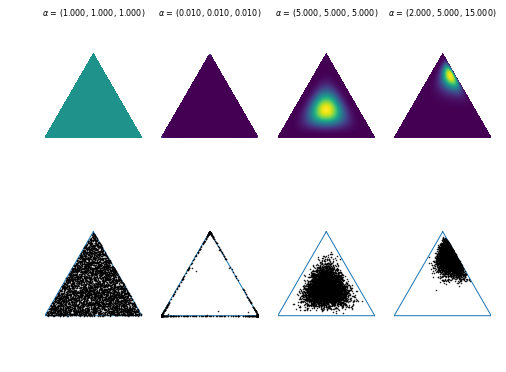

In [24]:
#https://gist.github.com/agitter/46b2169a035ad25b5d2b024a00344d54
'''Functions for drawing contours of Dirichlet distributions.'''

# Author: Thomas Boggs

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from functools import reduce

_corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
_triangle = tri.Triangulation(_corners[:, 0], _corners[:, 1])
_midpoints = [(_corners[(i + 1) % 3] + _corners[(i + 2) % 3]) / 2.0 \
              for i in range(3)]

def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.
    Arguments:
        `xy`: A length-2 sequence containing the x and y value.
    '''
    s = [(_corners[i] - _midpoints[i]).dot(xy - _midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        '''Creates Dirichlet distribution with parameter `alpha`.'''
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)])
    def sample(self, N):
        '''Generates a random sample of size `N`.'''
        return np.random.dirichlet(self._alpha, N)

def draw_pdf_contours(dist, border=False, nlevels=200, subdiv=8, **kwargs):
    '''Draws pdf contours over an equilateral triangle (2-simplex).
    Arguments:
        `dist`: A distribution instance with a `pdf` method.
        `border` (bool): If True, the simplex border is drawn.
        `nlevels` (int): Number of contours to draw.
        `subdiv` (int): Number of recursive mesh subdivisions to create.
        kwargs: Keyword args passed on to `plt.triplot`.
    '''
    from matplotlib import ticker, cm
    import math

    refiner = tri.UniformTriRefiner(_triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    if border is True:
        plt.hold(1)
        plt.triplot(_triangle, linewidth=1)

def plot_points(X, barycentric=True, border=True, **kwargs):
    '''Plots a set of points in the simplex.
    Arguments:
        `X` (ndarray): A 2xN array (if in Cartesian coords) or 3xN array
                       (if in barycentric coords) of points to plot.
        `barycentric` (bool): Indicates if `X` is in barycentric coords.
        `border` (bool): If True, the simplex border is drawn.
        kwargs: Keyword args passed on to `plt.plot`.
    '''
    if barycentric is True:
        X = X.dot(_corners)
    plt.plot(X[:, 0], X[:, 1], 'k.', ms=1, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    if border is True:
        plt.triplot(_triangle, linewidth=1)

f = plt.figure(figsize=(8, 6))
alphas = [[1] * 3,
          [0.01] * 3,
          [5] * 3,
          [2, 5, 15]]
for (i, alpha) in enumerate(alphas):
    plt.subplot(2, len(alphas), i + 1)
    dist = Dirichlet(alpha)
    draw_pdf_contours(dist)
    title = r'$\alpha$ = (%.3f, %.3f, %.3f)' % tuple(alpha)
    plt.title(title, fontdict={'fontsize': 8})
    plt.subplot(2, len(alphas), i + 1 + len(alphas))
    plot_points(dist.sample(5000))